In [1]:
# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade matplotlib
# !pip install --upgrade sklearn

In [2]:
# Some basic Data Libraries
import numpy as np  
import pandas as pd

# All rows and columns display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Cargamos nuestro dataset:

In [4]:
full_df = pd.read_csv('./data/combined_dataset.csv', sep=',', decimal='.')
full_df.head(5).T

,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 17:14:58,2019-01-01 17:14:58,2019-01-01 17:15:20,2019-01-01 17:16:08
cc_num,2703186189652095,342952484382519,3585740823295298,2356276337669917,4740713119940984
category,misc_net,personal_care,home,shopping_pos,personal_care
amt,4.97,8.84,36.07,9.83,17.69
gender,F,F,M,M,F
city,Moravian Falls,East Canaan,Quanah,Chester,Pomona
state,NC,CT,TX,MD,NY
zip,28654,6024,79252,21619,10970
lat,36.0788,42.0158,34.2956,38.9583,41.1901
long,-81.1781,-73.2913,-99.7494,-76.2842,-74.0436


In [5]:
type(full_df)

pandas.core.frame.DataFrame

Chequeamos que el shape siga siendo como antes:

In [6]:
full_df.shape

(1852394, 30)

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   city                   object 
 6   state                  object 
 7   zip                    int64  
 8   lat                    float64
 9   long                   float64
 10  city_pop               int64  
 11  job                    object 
 12  merch_lat              float64
 13  merch_long             float64
 14  is_fraud               int64  
 15  Year                   int64  
 16  Month                  int64  
 17  state_abbr             object 
 18  Unemployed percent     float64
 19  close_s&p_500          float64
 20  change_usd_eur         float64
 21  date                   object 
 22  crime_rate        

In [8]:
full_df.isnull().sum() 

trans_date_trans_time    0
cc_num                   0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
merch_lat                0
merch_long               0
is_fraud                 0
Year                     0
Month                    0
state_abbr               0
Unemployed percent       0
close_s&p_500            0
change_usd_eur           0
date                     0
crime_rate               0
age                      0
week_number              0
day_of_week              0
day                      0
time                     0
hour                     0
is_holiday               0
dtype: int64

No tenemos valores nulos.

Nuestro problema es un problema de **clasificación**: *fraude / no_fraude*. Es muy importante observar cuántas de las transacciones resultaron fraudulentas:

In [9]:
full_df_fraud = full_df[full_df['is_fraud']==1]
full_df_fraud.shape

(9651, 30)

In [10]:
full_df_nofraud = full_df[full_df['is_fraud']==0]
full_df_nofraud.shape

(1842743, 30)

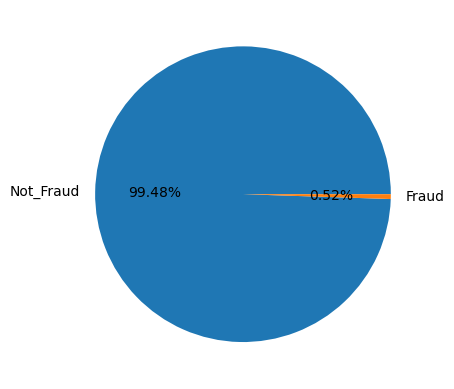

In [11]:
plt.pie(full_df['is_fraud'].value_counts(),labels=['Not_Fraud','Fraud'],autopct='%0.2f%%')
plt.show()

Se trata de un **problema muy desbalanceado**, como era de esperar: muy pocas de las transacciones totales resultan ser fraude.

### Vamos a separar las últimas 10.000 transacciones, ordenando por fecha, para validar nuestro modelo en una fase de Pre-Producción

In [12]:
full_df.sort_values(by='date', ascending = True, inplace = True) 

In [13]:
# Check it is ordered by date
full_df.tail()

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,Year,Month,state_abbr,Unemployed percent,close_s&p_500,change_usd_eur,date,crime_rate,age,week_number,day_of_week,day,time,hour,is_holiday
1850146,2020-12-31 23:55:47,213155997615567,kids_pets,54.81,M,Clune,PA,15727,40.5503,-79.3237,168,Race relations officer,39.561749,-78.748357,0,2020,12,PA,7.7,3756.07,0.8131,2020-12-31,389.5,45,53,Thursday,31,23:55:47,23,True
1850147,2020-12-31 23:49:26,4806443445305,shopping_pos,56.62,M,Ironton,OH,45638,38.5294,-82.6654,21635,Geochemist,37.776022,-82.463727,0,2020,12,OH,6.3,3756.07,0.8131,2020-12-31,308.8,22,53,Thursday,31,23:49:26,23,True
1850148,2020-12-31 23:49:22,2252055259910912,food_dining,71.28,M,Hewitt,WI,54441,44.6437,-90.1031,828,Arts development officer,44.601920,-90.658758,0,2020,12,WI,4.8,3756.07,0.8131,2020-12-31,323.4,32,53,Thursday,31,23:49:22,23,True
1850124,2020-12-31 23:50:34,371226440126102,kids_pets,43.54,F,Mulberry Grove,IL,62262,38.9311,-89.2463,1810,Race relations officer,39.121026,-88.866295,0,2020,12,IL,7.6,3756.07,0.8131,2020-12-31,425.9,48,53,Thursday,31,23:50:34,23,True
1852393,2020-12-31 23:59:34,4170689372027579,entertainment,38.13,M,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,36.210097,-97.036372,0,2020,12,OK,5.2,3756.07,0.8131,2020-12-31,458.6,30,53,Thursday,31,23:59:34,23,True


In [14]:
# Get the last 10,000 rows
last_10000 = full_df.tail(10000)

# Get the rest of the rows (excluding the last 10000)
rest_of_data = full_df.iloc[:-10000]

# Save the last 10,000 rows to a CSV file
last_10000.to_csv('./data/last_10000_rows.csv', index=False)

Continuamos con el análisis con el resto del Dataframe, `full_df`

#### Ya hemos comentado que se trata de un problema **muy desbalanceado**, así que será muy importante estratificar a la hora de dividir entre Train y Test

## Dividimos entre Train y Test: 

In [15]:
from sklearn.model_selection import train_test_split

features = full_df.columns.drop('is_fraud')

train, test = train_test_split(full_df, test_size=0.2, shuffle=True, stratify = full_df['is_fraud'], random_state=17)

print(f'Dimensiones del dataset de Training: {train.shape}')
print(f'Dimensiones del dataset de Testing: {test.shape}')

# Save into 2 different csv files
train.to_csv('./data/train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/test.csv', sep=';', decimal='.', index=False)

# From now on, we explore ONLY train data:
df = pd.read_csv('./data/train.csv', sep=';', decimal='.')

Dimensiones del dataset de Training: (1481915, 30)
Dimensiones del dataset de Testing: (370479, 30)


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
trans_date_trans_time,2019-02-11 14:48:59,2020-03-22 21:54:16,2019-07-07 10:33:08,2020-06-27 23:41:53,2019-05-15 12:12:17,2020-05-03 23:04:57,2020-08-29 11:07:07,2020-11-16 17:04:27,2020-12-21 07:10:09,2019-10-05 06:31:09
cc_num,213157767990030,3553629419254918,376028110684021,180094419304907,3501942333500073,4890424426862856940,30135235368675,30150717898388,180011453250192,6011626928491360
category,shopping_net,kids_pets,misc_pos,home,home,shopping_pos,misc_pos,home,grocery_net,misc_pos
amt,4.39,14.96,32.43,66.36,115.35,6.29,65.37,58.93,47.49,7.9
gender,F,F,M,F,F,M,F,M,M,F
city,Rock Springs,Conway,Meadville,Sun City,Phoenix,Sacramento,Independence,Paint Rock,New Boston,Bethel Springs
state,WY,WA,MO,CA,AZ,CA,MO,AL,IL,TN
zip,82901,98238,64659,92585,85086,95827,64058,35764,61272,38315
lat,41.606,48.34,39.7795,33.7467,33.8155,38.5662,39.1412,34.7031,41.2153,35.2289
long,-109.23,-122.3456,-93.3014,-117.1721,-112.1202,-121.3286,-94.3515,-86.3068,-90.9879,-88.644


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481915 entries, 0 to 1481914
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1481915 non-null  object 
 1   cc_num                 1481915 non-null  int64  
 2   category               1481915 non-null  object 
 3   amt                    1481915 non-null  float64
 4   gender                 1481915 non-null  object 
 5   city                   1481915 non-null  object 
 6   state                  1481915 non-null  object 
 7   zip                    1481915 non-null  int64  
 8   lat                    1481915 non-null  float64
 9   long                   1481915 non-null  float64
 10  city_pop               1481915 non-null  int64  
 11  job                    1481915 non-null  object 
 12  merch_lat              1481915 non-null  float64
 13  merch_long             1481915 non-null  float64
 14  is_fraud          

No tenemos valores nulos.

## Pintamos algunos histogramas de las variables más interesantes:

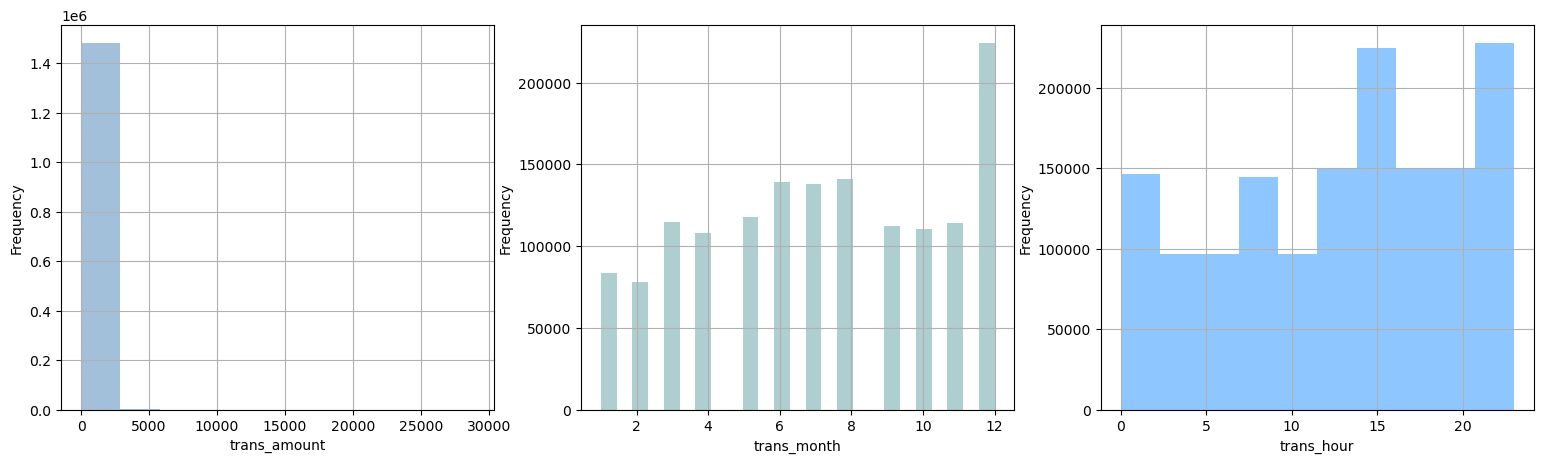

In [19]:
plt.figure(figsize=(19, 5))

plt.subplot(1,3,1)
df['amt'].plot.hist(alpha=0.5, bins=10, grid = True, color = 'steelblue')
plt.xlabel('trans_amount')

plt.subplot(1,3,2)
df['Month'].plot.hist(alpha=0.5, bins=25, grid = True, color = 'cadetblue')
plt.xlabel('trans_month')

plt.subplot(1,3,3)
df['hour'].plot.hist(alpha=0.5, bins=10, grid = True, color = 'dodgerblue')
plt.xlabel('trans_hour')

plt.show()

No sé si podemos considerar *outlier* esos valores de 30000 dólares en importe de la transacción. Pero está claro que la mayor parte de las transacciones son por valores por debajo de 5000 dolares

También se observa un aumento de las transacciones en el mes de Diciembre, probablemente debido a la cantidad de festivos que hay en ese mes. Con respecto a las horas de mayor volumen, está bastante repartido, aunque el mediodía y noche son los momentos más frecuentes.

### Otros gráficos interesantes:

Observamos la relación entre la población del municipio y la cantidad de la transacción:

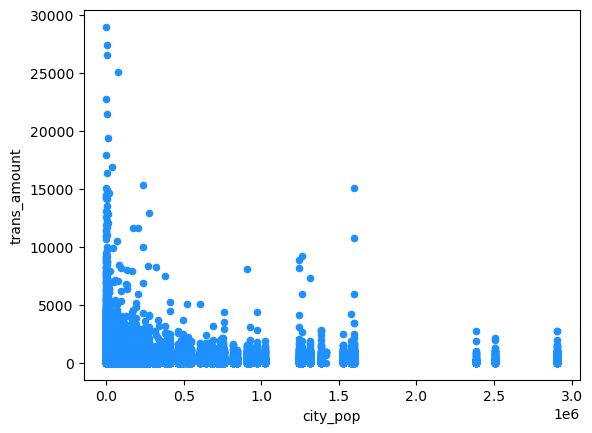

In [20]:
df.plot(kind = 'scatter',x='city_pop',y = 'amt', color = 'dodgerblue')
plt.xlabel('city_pop')
plt.ylabel('trans_amount')
plt.show()

La mayor parte de las transacciones se concentran en poblaciones pequeñas o medianas.

Vamos a codificar `gender` con `LabelEncoder` para poder pintarlo:

In [21]:
from sklearn import preprocessing

le_gender = preprocessing.LabelEncoder()
df["gender"] = le_gender.fit_transform(df["gender"])

Pintamos histograma de la edad y género de las personas del dataset:

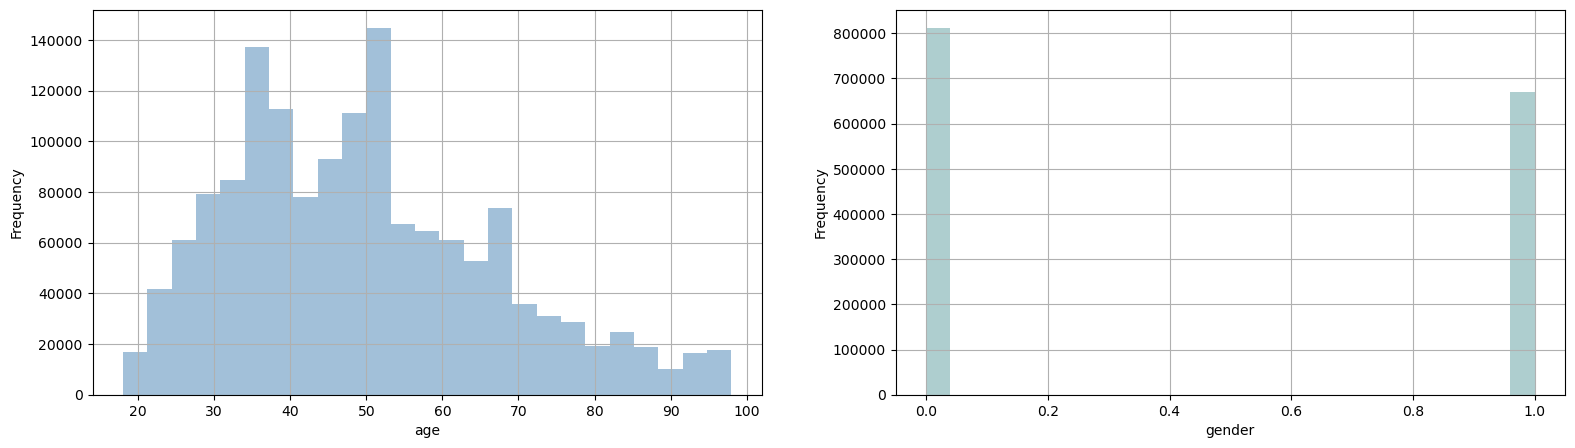

In [22]:
plt.figure(figsize=(19, 5))

plt.subplot(1,2,1)
df['age'].plot.hist(alpha=0.5, bins=25, grid = True, color = 'steelblue')
plt.xlabel('age')

plt.subplot(1,2,2)
df['gender'].plot.hist(alpha=0.5, bins=25, grid = True, color = 'cadetblue')
plt.xlabel('gender')

plt.show()

Hay una ligeramente mayor cantidad de mujeres que hombres en el dataset, y las edades se sitúan mayoritariamente entre los 30-35 y los 45-55 años 

## Estudio sobre las variables categóricas

Otras variables que son categóricas: *category*, *city*, *state*, *job* y *state_name*

Vamos a ver cuántas "categorías" diferentes tenemos en cada variable, para hacernos una idea de la dimensionalidad a codificar en valor numérico:

In [23]:
df.select_dtypes(include=['object']).describe()

,trans_date_trans_time,category,city,state,job,state_abbr,date,day_of_week,time
count,1481915,1481915,1481915,1481915,1481915,1481915,1481915,1481915,1481915
unique,1460810,14,906,51,497,51,730,7,86400
top,2020-12-13 17:53:47,gas_transport,Birmingham,TX,Film/video editor,TX,2020-11-30,Monday,23:33:40
freq,4,150564,6444,108167,11134,108167,5190,295376,47


Respecto a las fechas, ya habíamos hecho el ejercicio de desagregar `trans_date_trans_time` en día, mes, etc. así que sin problema podemos eliminar `trans_date_trans_time`, `time` y `day_of_week` tenemos que pasarla a valor numérico

De las demás, estas son que nos interesan especialmente:

In [24]:
print(f'Merchant Categories: ' , len(df['category'].unique()))
print(f'City Categories: ' , len(df['city'].unique()))
print(f'State Categories: ' , len(df['state'].unique()))
print(f'Job Categories: ' , len(df['job'].unique()))

Merchant Categories:  14
City Categories:  906
State Categories:  51
Job Categories:  497


Hay bastante diferencia entre las categorías de comercios y las de oficios/trabajos. Por supuesto, era de esperar que tuviéramos amplia variedad de Ciudades y Estados. 

Vamos a graficar las variables de `city` y `state`, ya que las otras tienen tantos valores posibles que el gráfico no quedaría claro pintándolo con `matplotlib`:

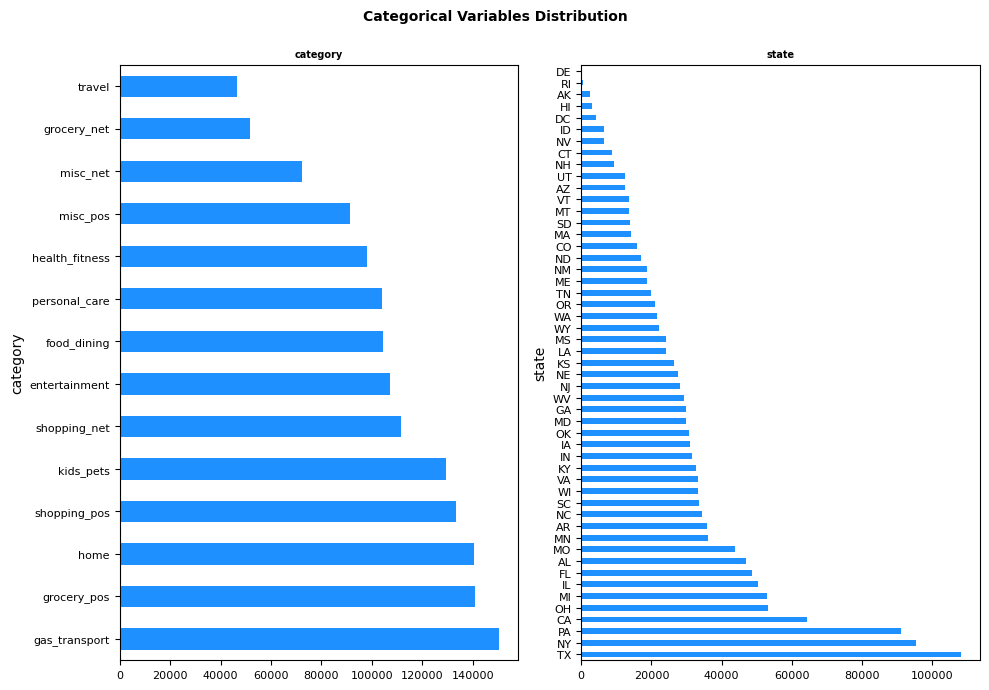

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
axes = axes.flat
columns_object = ['category',  'state']

for i, column in enumerate(columns_object):
    df[column].value_counts().plot.barh(ax = axes[i], color = 'dodgerblue')
    axes[i].set_title(column, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Categorical Variables Distribution',
             fontsize = 10, fontweight = "bold");

Vemos que la mayor parte de las transacciones se han hecho en gasolineras, tiendas de alimentación y de artículos del hogar, aunque todas las categorías tienen gran volumen transaccional. Respecto a los estados, Texas tiene muchísima más frecuencia, después vendrían Nueva York y Pennsylvania.

Con esta operación, hemos comprobado que en el conjunto de Train tenemos los 50 Estados miembros de EEUU (más el Distrito de Columbia). 
Según el tipo de variable, vamos a tener que usar Encoders distintos.

## Matriz de Correlación

Antes de codificar variables categóricas, vamos a echarle un vistazo a la matriz de correlación entre variables **numéricas**:

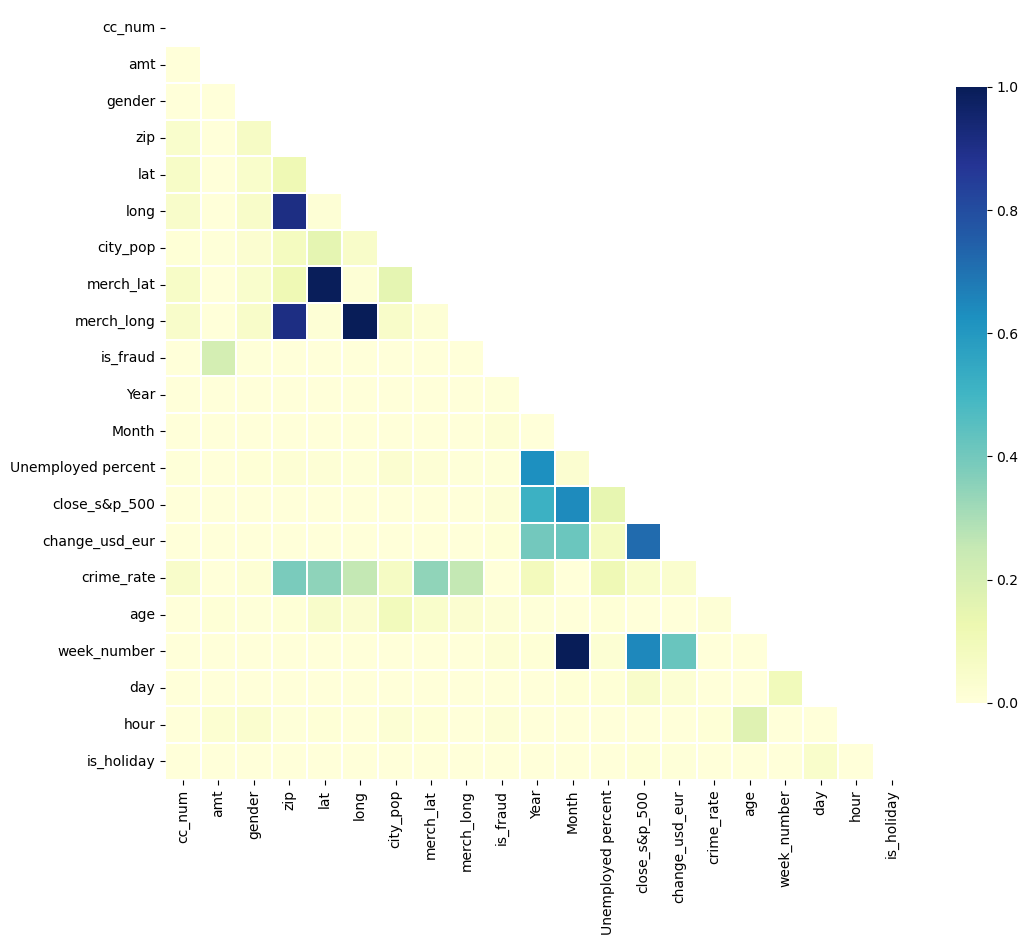

In [26]:
import seaborn as sns

# Delete all text variables
corr = np.abs(df.drop(['category','city','state','state_abbr','job','trans_date_trans_time','date','time','day_of_week'], axis = 1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

No se ven correlaciones especialmente claras, más allá las que relacionan el valor del dólar-euro según el mes o año, las latitudes y longitudes, la tasa de criminalidad según la ubicación y el año. Se ve una ligeramente superior correlación entre el fraude/no fraude y la cantidad de la transacción.

## Features más relevantes con respecto a variable objetivo `is_fraud`:

Para los siguientes gráficos necesitamos tener en la primera columna la variable objetivo:

In [27]:
column_to_move = df.pop("is_fraud")
df.insert(0, 'is_fraud', column_to_move)
df.head().T

,0,1,2,3,4
is_fraud,0,0,0,0,0
trans_date_trans_time,2019-02-11 14:48:59,2020-03-22 21:54:16,2019-07-07 10:33:08,2020-06-27 23:41:53,2019-05-15 12:12:17
cc_num,213157767990030,3553629419254918,376028110684021,180094419304907,3501942333500073
category,shopping_net,kids_pets,misc_pos,home,home
amt,4.39,14.96,32.43,66.36,115.35
gender,0,0,1,0,0
city,Rock Springs,Conway,Meadville,Sun City,Phoenix
state,WY,WA,MO,CA,AZ
zip,82901,98238,64659,92585,85086
lat,41.606,48.34,39.7795,33.7467,33.8155


Y tenemos que eliminar todas las variables que no son numéricas:

In [28]:
df_num = df.drop(['category','city','state','state_abbr','job','trans_date_trans_time','date','time','day_of_week'], axis = 1)

Transformamos `is_holiday` a numérico:

In [29]:
df_num['is_holiday'] = df_num['is_holiday'].astype(int)

In [30]:
print(df_num.dtypes)

is_fraud                int64
cc_num                  int64
amt                   float64
gender                  int32
zip                     int64
lat                   float64
long                  float64
city_pop                int64
merch_lat             float64
merch_long            float64
Year                    int64
Month                   int64
Unemployed percent    float64
close_s&p_500         float64
change_usd_eur        float64
crime_rate            float64
age                     int64
week_number             int64
day                     int64
hour                    int64
is_holiday              int32
dtype: object


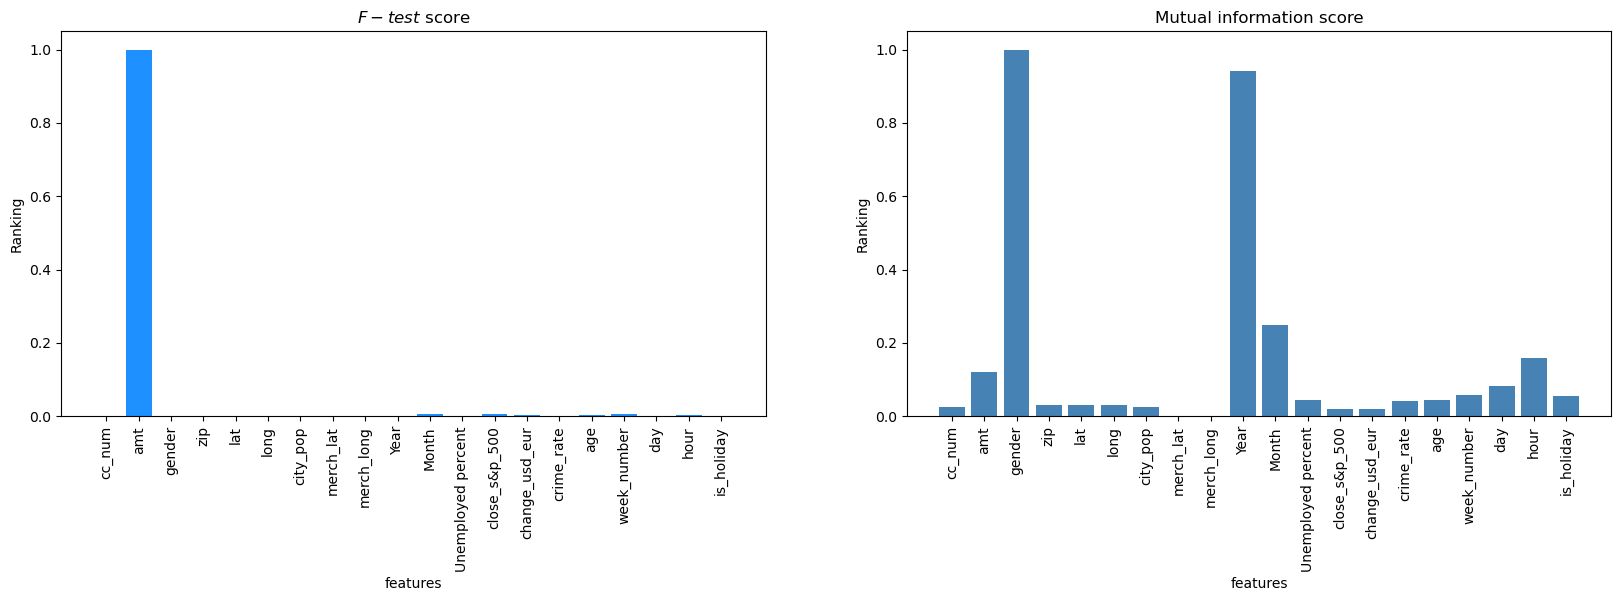

In [31]:
from sklearn.feature_selection import f_classif, mutual_info_classif

# sklearn format of the dataframe
data = df_num.values 

y = data[:,0:1]     # 1st column , is_fraud
X = data[:,1:]      # rest of columns

feature_names = df_num.columns[1:]

# do calculations
f_test ,_ = f_classif(X, y) # Compute the ANOVA F-value for the provided sample.
f_test /= np.max(f_test)

mi = mutual_info_classif(X, y) # Estimate mutual information for a discrete target variable.Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. 
                                #It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center", color = 'dodgerblue')
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center", color = 'steelblue')
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

A falta de procesar en valor numérico todas las variables categóricas, está claro que la cantidad monetaria de la transacción es muy relevante para predecir el fraude.